# Preparation

In [1]:
pip install xlrd

     |████████████████████████████████| 96 kB 1.9 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

     |████████████████████████████████| 9.9 MB 78 kB/s  eta 0:00:01     |████████████████████████████▉   | 8.9 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 103 kB/s  eta 0:00:01    |███████████████████▉            | 9.5 MB 10.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

     |████████████████████████████████| 10.3 MB 130 kB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 34.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 49.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn==0.22

     |████████████████████████████████| 7.0 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 27.4 MB 63 kB/s  eta 0:00:011B/s eta 0:00:01��██████████████                | 13.7 MB 34.6 MB/s eta 0:00:01�██▌| 27.0 MB 9.7 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 41.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install openpyxl

     |████████████████████████████████| 243 kB 4.1 MB/s eta 0:00:01     |████████████████████▏           | 153 kB 4.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install k_means_constrained

     |████████████████████████████████| 557 kB 3.8 MB/s eta 0:00:01     |█████████████                   | 225 kB 3.8 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 14.4 MB 7.5 MB/s eta 0:00:01    |████████▊                       | 3.9 MB 4.6 MB/s eta 0:00:03     |██████████████████████████▌     | 11.9 MB 4.6 MB/s eta 0:00:01     |█████████████████████████████▍  | 13.2 MB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 129 kB 62.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 41.1 MB/s eta 0:00:01
  Created wheel for k-means-constrained: filename=k_means_constrained-0.5.2-cp37-cp37m-linux_x86_64.whl size=1470823 sha256=97948cb401130af780432ccfb28ebdec85ef95da252df07b2a7f66704f7f0aca
  Stored in directory: /home/jovyan/.cache/pip/wheels/6e/90/e7/9164231d6675be08f62c4a76debd4a0c26bcfd408be143c66e
Successfully built k-means-

## Clustering with equal cluster size

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [9]:
from k_means_constrained import KMeansConstrained

In [11]:
df=pd.read_excel(r'Geolocation.xlsx',sheet_name='Base')
temp_df=df[['PartyMasterCode','outlet_latitude','outlet_longitude']]
temp_df.dropna(inplace=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
df=pd.read_excel(r'Geolocation.xlsx',sheet_name='Configuration')
min_df=df[['Minimum Size']]
max_df=df[['Maximum Size']]
av_df=df[['Average Size']]
          
min_s = int(min_df.iat[0,0])
max_s = int(max_df.iat[0,0])
av_s = int(av_df.iat[0,0])
print(min_s)
print(max_s)
print(av_s)

23
28
27


In [13]:
num_bts=int(temp_df.shape[0]/av_s)
print(num_bts)

268


In [14]:
kmeans_1 = KMeansConstrained(size_min=min_s, size_max=max_s, init ='k-means++',n_clusters=num_bts, max_iter=10)
kmeans_1.fit(temp_df[temp_df.columns[1:3]]) # Compute k-means clustering.
temp_df['cluster_label'] = kmeans_1.fit_predict(temp_df[temp_df.columns[1:3]])
temp_df.head(10)

,PartyMasterCode,outlet_latitude,outlet_longitude,cluster_label
0,D-P22329,22.487487,88.189528,47
1,D-P41337,22.551768,88.244618,62
2,D-P36429,22.523658,88.245412,203
3,D-P39072,22.551235,88.246307,62
4,D-P39087,22.551242,88.247103,62
5,D-P39082,22.549393,88.248058,62
6,D-P39047,22.550965,88.248370,62
7,D-P39012,22.550252,88.248383,62
8,D-P50453,22.502409,88.248736,54
9,D-P39052,22.550870,88.249180,62


In [15]:
centers = kmeans_1.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans_1.predict(temp_df[temp_df.columns[1:3]]) # Labels of each point

In [16]:
temp_df.to_excel("Beats_plan.xlsx")

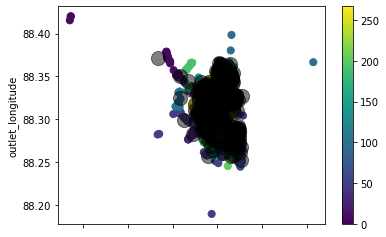

In [17]:
temp_df.plot.scatter(x = 'outlet_latitude', y = 'outlet_longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)